## Problem Statament 

You are working as a Marketing Manager in a company and you want to increase the spends on advertisement in order to increase the sales. You want to find the most optimal way to increase the sales. So you want the team to find which modes is the best for advertisment. 

### Importing Libararies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 90% !important}</style>"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Data Acquisiton and Description

In [2]:
advertisement = pd.read_csv("advertising (2).csv")

### Data Pre - Profiling

In [3]:
advertisement.shape

(200, 4)

- Dataset has 200 rows and 4 columns

In [4]:
advertisement.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


- Dataset has 4 columsn; TV, Radio, Newspaper and Sales. 
- Here, TV, Radio, Newspaper are the predictor variable & Sales is the outcome variable. 
- This dataset shows the amounts spend on the advertisment on different modes with the respective sales. 
- we can see here that amount spends for the advertisment on TV is relatively on the higher side with respect the amount spends on Radio and Newspaper. 
- This is possible maybe because ads on TV are expensive then the latters. 

In [5]:
advertisement.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- In TV, we can see the values are gradually increasing. there is no sudden increase during any phase of the quartiles. Everything seems pretty normal here. 
- Radio follows the same pattern. 
- In newspaper we can see there is steep increase in 3rd quartile and the 100% which suggests the presence of outliers. 
- Sales is also gradually increasing. 
- Here we can see a pattern between the sales and Tv , we can see that with 25%, 50% and 75% the sales value is also increasing and also when the max amount were spend on sales there was the max sales. so there is a postivie correaltion between the sales and TV

In [6]:
advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- There are no missing values. Our dataset is complete and ready for analysis. 
- All the columns are numerical and continuous data types. 
- Dataset is comparatively small with only 200 rows and using memory of 6.4kb. 

In [7]:
advertisement_orginal = advertisement.copy()

###  Data Pre Processing

- This section is emphasized on performing data manipulation over unstructured data for furthur processing and analysis.
- To modify unstructured data to the structured data we will verify and manipulate the integrety of the data by
    - Data Handling Outliers

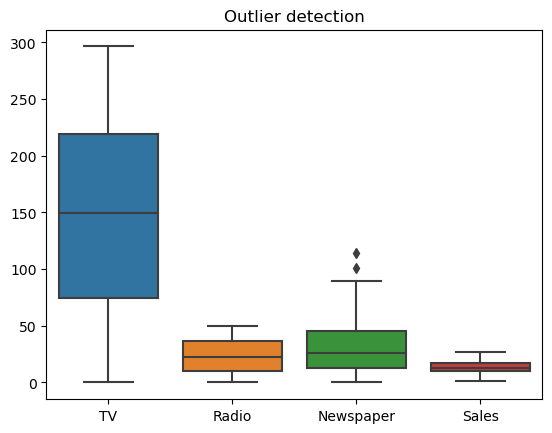

In [8]:
sns.boxplot(advertisement)
plt.title("Outlier detection")
plt.show()

In [9]:
# dealing with outliers 
q1 = np.quantile(advertisement.Newspaper, 0.25)
q3= np.quantile(advertisement.Newspaper, 0.75)
IQR = q3 - q1 
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)
advertisement = advertisement[(advertisement.Newspaper>lower_bound) &(advertisement.Newspaper<upper_bound)]

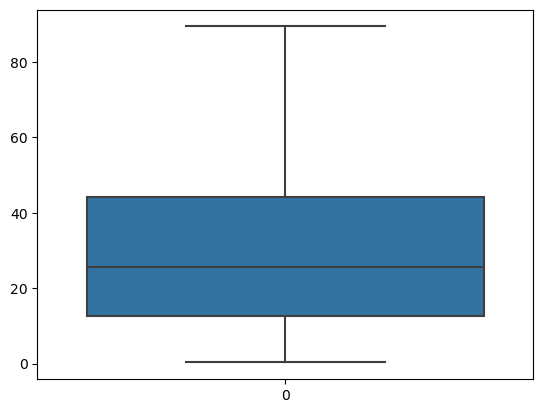

In [10]:
# verifying the removal of outlier: 
sns.boxplot(advertisement.Newspaper)
plt.show()

- This plot verifies that there is some outliers in the Newspaper. 
- Not a lot of outliers are present in the Newspaper column and maybe it is possible that at that one or two times they spend more money to increase the sales. 

### Exploratory Data Analysis

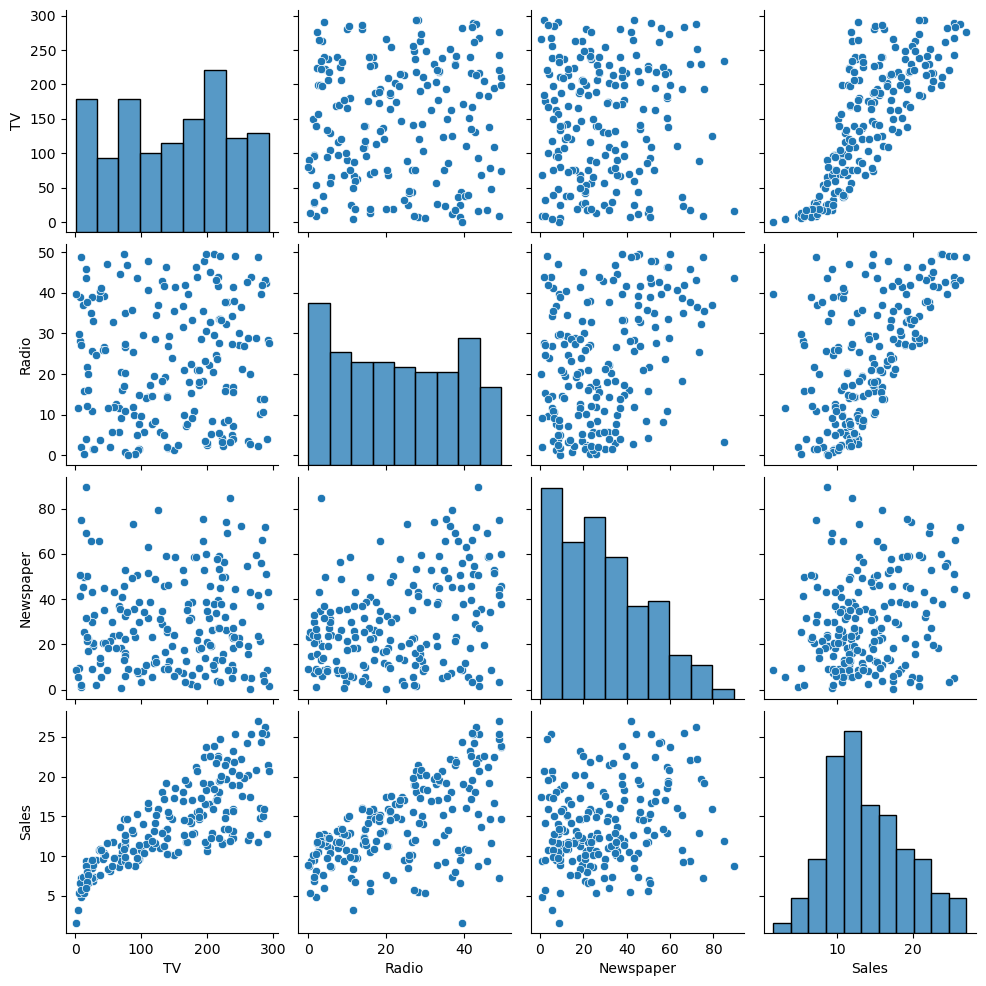

In [11]:
# plotting the pairplot to see if there is any correlation between the variables. 
# Linearity Check 
sns.pairplot(advertisement)
plt.show()

- It is observed that there is substantial correlation between the TV advertisement spend and Sales, which aligns with my initial hypothesis. 
- It appears to be there is a linear relationship between the Sales and TV advertisement spends. 
- Radio spends shows moderate positive correlation with the sales. 
- Newspaper exhibits minimal to negligible correlation with Sales. 
- Primarily, visual analysis did not indicated the Multicollinearity but we have to to check the heatmap for that. 

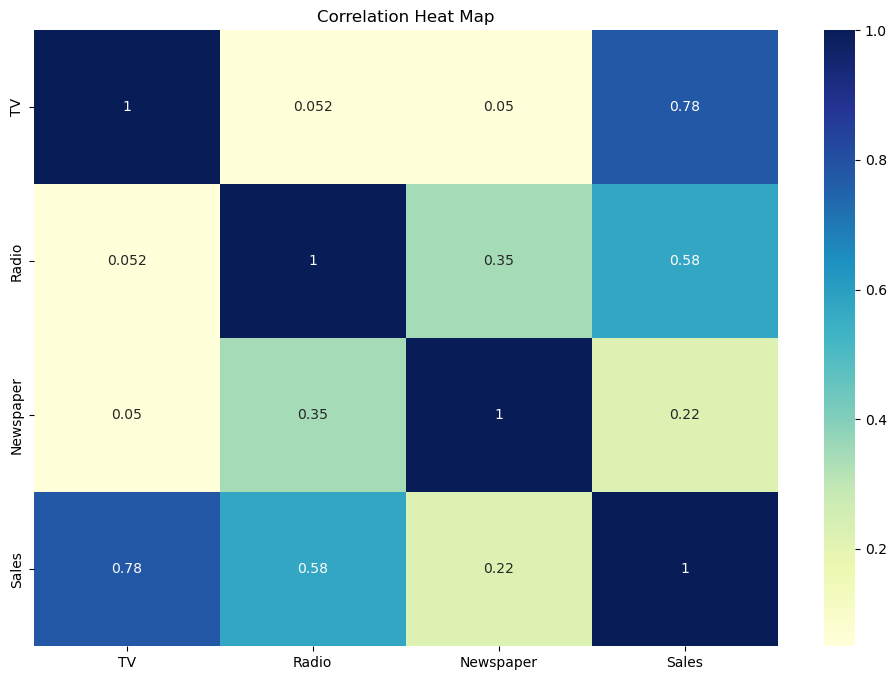

In [12]:
# plotting heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(advertisement.corr(), annot = True, cmap = 'YlGnBu')
plt.title("Correlation Heat Map")
plt.show()

- TV advertisment spends have substantial postive correlation with coefficient of 0.78 with the sales. This aligns with my initial hypothesis. 
- Radio spends has moderate positive correlation coefficient of 0.58.
- Newspaper spends have minimal correlation coefficients of 0.23.
- There's minimal to negligible correlation present between the TV advertisement and other predictor variable. 
    - Their correlation coefficients are as follows: 
        - TV advertisement spends with Newspaper advertisement spends - 0.057
        - TV advertisement spends with Radio advertisment spends - 0.055
- There is moderate to minimal correlation present between the Newspaper and Radio with correlation coefficient 0.35

### Splitting the data into training & test sets

In [13]:
# dividing the predictor variables and the outcome variable
X = advertisement[['TV', 'Radio', 'Newspaper']]
y = advertisement[['Sales']]

In [14]:
print("Dimension of X: {}".format(X.shape))
print("Dimension of y: {}".format(y.shape))

Dimension of X: (198, 3)
Dimension of y: (198, 1)


- There are 3 predictor variables in X. 
- There is one outcome variable in y. 
- Now, the data is ready to be splitted into the training & test sets to build our model. 

In [15]:
# splitting the data into the training & test sets with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 100)

In [16]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [17]:
print("Dimension of X_train: {}".format(X_train.shape))
print("Dimension of X_test: {}".format(X_test.shape))
print("Dimension of y_train: {}".format(y_train.shape))
print("Dimension of y_test: {}".format(y_test.shape))

Dimension of X_train: (138, 3)
Dimension of X_test: (60, 3)
Dimension of y_train: (138, 1)
Dimension of y_test: (60, 1)


- The dataset has been successfully partitioned into the training & test sets with the ratio of 70:30. 
- The training set, X_train has 140 records with 3 features. This will be used to build our model. 
- The test set , X_test has 60 records with 3 features, this will be used to validate our model performance. 
- Similarly the outcome variable are partitioned into y_train & y test. 
- random state has been set to 100 to get the exact same results when needed. 
- Next, we will rescale the feautres as the TV advertisement has higher numbers as compared to other variables which can lead to higher coefficient. 
- after that we will start building our model using stepwise method, i.e we will take one variable at a time and then add other variable and if that makes our model good then proceed with the same process else we drop it and add another. We will repeat this process unless we get the best model with good R squared value & adjusted R squared value

### Rescaling 

In [18]:
y_train = y_train = np.array(y_train).flatten()


In [19]:
# Rescaling the features to make them on the same scale. First we are doing this on the training set

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)


In [20]:
X_train_scaled.head()

,TV,Radio,Newspaper
0,0.033874,0.880325,1.000000
1,0.508821,0.831643,0.650452
2,0.697601,0.908722,0.210407
3,0.821454,0.332657,0.247738
4,0.075159,0.024341,0.361991


In [21]:
X_train_scaled.describe()

,TV,Radio,Newspaper
count,138.000000,138.000000,138.000000
mean,0.512463,0.452406,0.349572
std,0.301906,0.301639,0.234545
min,0.000000,0.000000,0.000000
25%,0.252029,0.190162,0.170532
50%,0.505822,0.430020,0.296946
75%,0.778052,0.701826,0.507353
max,1.000000,1.000000,1.000000


- Now we can see here all the features has been scaled in between 0 to 1. 
- With all the features all the same scale now, our data is ready for modelling. 

### Building a Linear Model

In [22]:
# as we are building a model using a stepwise forward technique. we will first build our model using only TV

In [23]:
# adding constant
X_train_1 = X_train_scaled['TV']
X_train_sm = sm.add_constant(X_train_1)
X_train_sm

,const,TV
0,1.0,0.033874
1,1.0,0.508821
2,1.0,0.697601
3,1.0,0.821454
4,1.0,0.075159
...,...,...
133,1.0,0.285815
134,1.0,0.460833
135,1.0,0.811927
136,1.0,0.901905


In [24]:
# creating the first fitted model
lr1 = sm.OLS(y_train, X_train_sm).fit()

In [25]:
#checking the parameters obtained
print(lr1.params)

const     7.665208
TV       12.601859
dtype: float64


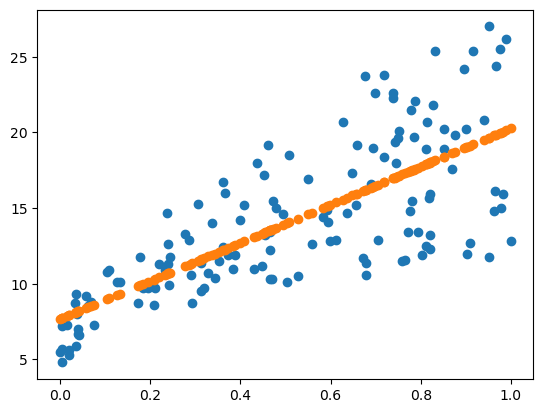

In [52]:
# visualizing the data with the scatter plot and the fitted regression line
plt.scatter(X_train_scaled['TV'], y_train)
plt.scatter(X_train_scaled['TV'], 7.665208 + 12.601859*X_train_scaled['TV'])
plt.show()

In [53]:
# checking the summary of linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     170.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           9.31e-26
Time:                        17:32:15   Log-Likelihood:                -364.13
No. Observations:                 138   AIC:                             732.3
Df Residuals:                     136   BIC:                             738.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.6652      0.574     13.363      0.0

- R square obtained in 0.613. This means TV is able to capture the 61% variation in the sales. 
- Adjusted R Squared is 0.611 which is lower than the R Squared which correctly follows its characterstics. 
- p value is 0.000 for TV which makes it significant. 
- coefficient of TV is 13.7493 which mean 1 unit increase in the TV is associated with an increase in sales by 13.7493 times. 
- AIC : 745.2 & BIC: 751.1 this may be not important at this time but it will be used is selecting the final model. 

#### Adding another Variable

In [54]:
# we will add another variable which has the second highest correlatino with the sales 
advertisement.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.051978,0.049771,0.779121
Radio,0.051978,1.000000,0.346364,0.576748
Newspaper,0.049771,0.346364,1.000000,0.219555
Sales,0.779121,0.576748,0.219555,1.000000


- Correlation of Sales with TV: 0.782224
- Correlation of Sales with Radio: 0.576223
- Correlation of Sales with Newspaper: 0.228299
- After TV, Radio has the highest correlation with Sales. 
- Therefore, we will now add Radio to the model. 

In [55]:
#adding constant and the variable 
X_train_sm1 = sm.add_constant(X_train_scaled[['TV','Radio']])
X_train_sm1.head()

,const,TV,Radio
0,1.0,0.033874,0.880325
1,1.0,0.508821,0.831643
2,1.0,0.697601,0.908722
3,1.0,0.821454,0.332657
4,1.0,0.075159,0.024341


In [56]:
#fitting the model 
lr2 = sm.OLS(y_train, X_train_sm1).fit()

In [57]:
#checking parameters
print(lr2.params)

const     3.231772
TV       12.436614
Radio     9.986861
dtype: float64


In [58]:
# so now variation of y is dependent on this formula: 

#       y = 3.231772 + 12.436614 * TV + 9.986861* Radio

In [59]:
# checking the statistical summary of the model 
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     641.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.16e-69
Time:                        17:32:18   Log-Likelihood:                -257.93
No. Observations:                 138   AIC:                             521.9
Df Residuals:                     135   BIC:                             530.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2318      0.333      9.705      0.0

- R-squared is now 0.905 which means now it is able to capture almost 90% of the variation in sales. 
- p-value of the all the features is 0.000 which makes them all significant. 
- Adjusted R-squared is now 0.891 which is still less than the R-squared. 
- AIC: 521.9 & BIC: 530.6 which is less than the previous model. 
- Combined the R squared, Adjusted R squared , AIC and BIC makes this model better than the previous model. 
- As of now we can say that this model is good for us but as we have added another feature into this model we need to check that does the features have multicollinearity. 
- To check the multicollinearity we will use the Variation Inflation Factor

In [60]:
# Checking VIF 
# creating a dataframe that will contain the names of all the feature varaiable
vif = pd.DataFrame()
vif['Features'] = X_train_sm1.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm1.values, i) for i in range(X_train_sm1.shape[1])]
vif

,Features,VIF
0,const,6.084651
1,TV,1.000274
2,Radio,1.000274


- VIF values of constant is slighly higher than 5 but its p-value is low.
- In Regression higher value of VIF is not a concern in VIF analysis.
- This means the other two predictors 'TV' and 'Radio' has multicollinearity with constant. 
- This model is able to cover almost 90 % of the variation which is good for now. 
- But for the sake of learning what happens if we drop the Radio and use Newspaper for our model. we will check that.

#### Adding 'Newspaper' & Removing Radio

In [61]:
X_train_sm2 = X_train_scaled[['TV', 'Newspaper']]

#adding constant
X_train_sm2 = sm.add_constant(X_train_sm2)

X_train_sm2.head()

,const,TV,Newspaper
0,1.0,0.033874,1.000000
1,1.0,0.508821,0.650452
2,1.0,0.697601,0.210407
3,1.0,0.821454,0.247738
4,1.0,0.075159,0.361991


In [62]:
# fitting the model and checking the parameters

# fitting the model 
lr3 = sm.OLS(y_train, X_train_sm2).fit()

# checking the parameters
print(lr3.params)

const         5.918079
TV           12.742105
Newspaper     4.792309
dtype: float64


In [63]:
# so now variation of y is dependent on this formula: 

#       y = 5.507818 + 13.317198 * TV + 6.313767* Radio

In [64]:
# now we will check the statistical summary of the model 
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           6.24e-28
Time:                        17:32:25   Log-Likelihood:                -356.15
No. Observations:                 138   AIC:                             718.3
Df Residuals:                     135   BIC:                             727.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9181      0.693      8.545      0.0

- R-squared is now 0.605 which means now it is able to capture almost 60% of the variation in sales. 
- p-value of the all the features is 0.000 which makes them all significant. 
- Adjusted R-squared is now 0.660 which is still less than the R-squared. 
- AIC: 718.3 & BIC: 727.1 which is higher than the previous model. 
- Combined the R squared, Adjusted R squared , AIC and BIC makes the previous model better than the this model. 
- As of now we can say that previous model is good for us but as we have added another feature into this model we need to check that does the features have multicollinearity. 
- To check the multicollinearity we will use the Variation Inflation Factor

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm2.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm2.values, i) for i in range(X_train_sm2.shape[1])]
vif

,Features,VIF
0,const,6.339442
1,TV,1.001421
2,Newspaper,1.001421


####  Dropping TV and Adding 'Radio' to the model 

In [66]:
X_train_sm3 = X_train_scaled[['Radio', 'Newspaper']]

# adding constant
X_train_sm3 = sm.add_constant(X_train_sm3)

X_train_sm3.head()

,const,Radio,Newspaper
0,1.0,0.880325,1.000000
1,1.0,0.831643,0.650452
2,1.0,0.908722,0.210407
3,1.0,0.332657,0.247738
4,1.0,0.024341,0.361991


In [67]:
# fitting the model and then we will check the statistical summary

lr4 = sm.OLS(y_train, X_train_sm3).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     39.41
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           3.31e-14
Time:                        17:32:27   Log-Likelihood:                -388.46
No. Observations:                 138   AIC:                             782.9
Df Residuals:                     135   BIC:                             791.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8627      0.708     13.922      0.0

- R-squared is now 0.314 which means now it is able to capture almost 31% of the variation in sales. 
- p-value of Newspaper is 0.172 which makes it insignificant. 
- Adjusted R-squared is now 0.304 which is still less than the R-squared. 
- AIC: 827.5 & BIC: 836.3 which is higer than all the previous models. 
- Combined the R squared, Adjusted R squared , AIC and BIC makes this model worst than all the previous models. 
- As of now we can say that this model is not good at all but as we have added another feature into this model we need to check that does the features have multicollinearity. 
- To check the multicollinearity we will use the Variation Inflation Factor

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm3.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm3.values, i) for i in range(X_train_sm3.shape[1])]
vif

,Features,VIF
0,const,4.152991
1,Radio,1.224709
2,Newspaper,1.224709


##### So our final selected model is Second Model. 

- y = y = 2.750913 + 13.464120 * TV + 9.547414* Radio
- Based on the R-Squared , Adjusted R-Squared, p-values of the features, AIC and BIC, this model is performing better than the others. 
- Now we will perform Residual Analysis

### Residual Analysis of the Train Data

In [69]:
y_train_sales = lr2.predict(X_train_sm1)

Text(0.5, 0, 'Errors')

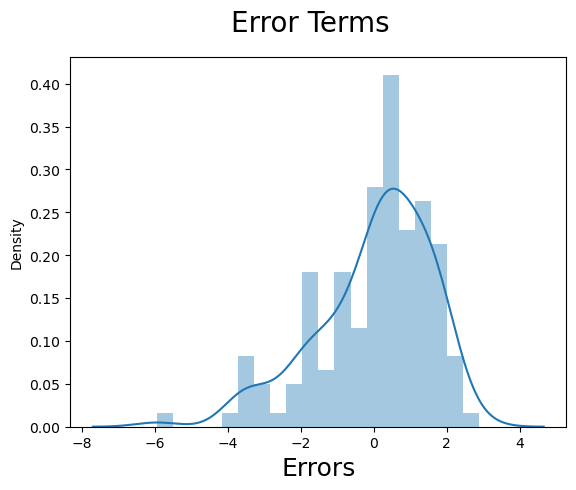

In [70]:
# checking the distribution of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_sales), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

- we can see here that that there is a distribution which is almost a bell curve. 
- the distribution has mean = 0. 
- for further analysis of error terms we will plot a QQ plot. 

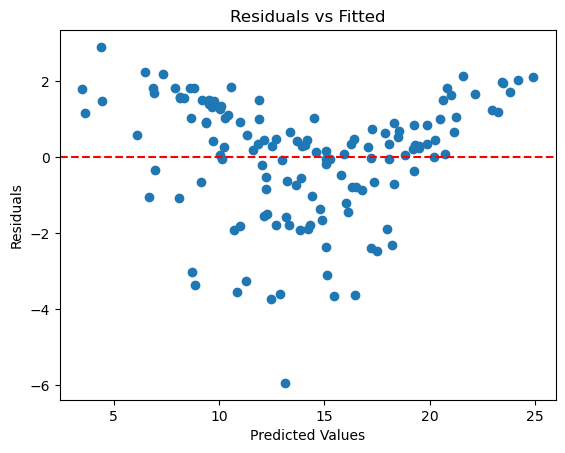

In [71]:
# homoscedasticity check 
predicted_values = lr2.fittedvalues

# Scatter plot of predicted values vs residuals
plt.scatter(predicted_values, (y_train - y_train_sales))
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


- There is no visible pattern. 

In [77]:
# checking independence on residuals

from statsmodels.stats.stattools import durbin_watson

# Assuming `residuals` are from your model
dw_stat = durbin_watson((y_train - y_train_sales))
print(f'Durbin-Watson statistic: {dw_stat}')


Durbin-Watson statistic: 1.9144604136157048


- A Durbin-Watson statistic close to 2 suggests that there is no autocorrelation. A value towards 0 indicates positive autocorrelation, and a value towards 4 indicates negative autocorrelation.

### Making Predictions Using the Final Model

In [46]:
# scaling the test sets 
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

In [47]:
X_test_scaled.describe()

,TV,Radio,Newspaper
count,60.000000,60.000000,60.000000
mean,0.444419,0.487694,0.270249
std,0.297624,0.302144,0.215466
min,-0.023289,-0.006085,-0.007919
25%,0.159933,0.226166,0.093609
50%,0.470713,0.476673,0.214367
75%,0.683574,0.783469,0.417986
max,1.010233,0.987830,0.884615


In [48]:
# adding constant to the test dataframe
X_test_sm = sm.add_constant(X_test_scaled)

In [49]:
# dropping the newspaper as there is no newspapaer in our model 
X_test_final = X_test_sm.drop('Newspaper', axis = 1)
X_test_final.head()

,const,TV,Radio
0,1.0,0.751588,0.987830
1,1.0,0.062456,0.217039
2,1.0,0.758998,0.081136
3,1.0,0.859562,0.734280
4,1.0,0.713832,0.411765


In [50]:
# Making predictions using the second model 
y_pred_final = lr2.predict(X_test_final)

### Model Evaluation

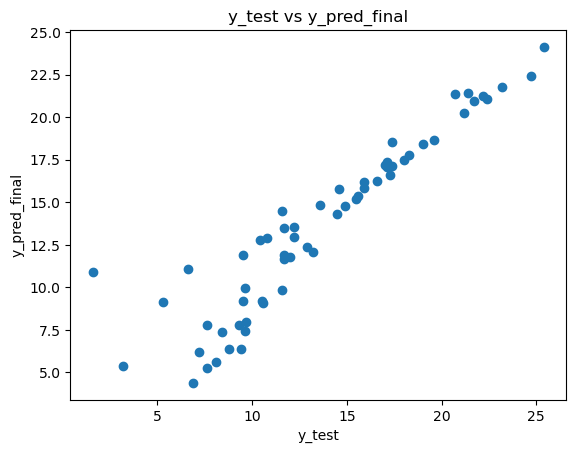

In [51]:
# plotting y_test vs y_test to understand the spread
plt.scatter(y_test, y_pred_final)
plt.title('y_test vs y_pred_final')
plt.xlabel('y_test')
plt.ylabel('y_pred_final')
plt.show()

#####  The equation of our best fit line is : y =3.231772 + 12.436614 * TV + 9.986861* Radio

##  Final Observation

Final Verdict:

After a thorough analysis of the advertising dataset, which included exploratory data analysis, preprocessing, and model building, the following key observations were made:

1. The linear regression model, incorporating TV and Radio advertisement spends as predictors, emerged as the most effective in predicting sales. This model accounted for approximately 90% of the variance in sales, as indicated by an R-squared value of 0.905, demonstrating a strong fit.

2. The TV advertisement spends were identified as the most significant contributor to sales, followed by Radio. The inclusion of Newspaper spends did not significantly improve the model's predictive capability and was therefore excluded from the final model.

3. The final model formula based on our analysis is: Sales = 3.231772 + 12.436614 * TV + 9.986861 * Radio. This equation underscores the importance of optimizing TV and Radio advertising budgets to maximize sales.

Recommendations for Future Work:
To further refine the sales prediction model and enhance its predictive accuracy, the following steps are recommended:

- Exploring non-linear models or interaction effects between predictors to capture more complex relationships between advertising spends and sales.
- Conducting cross-validation to assess the model's generalizability and prevent overfitting.
- Investigating the potential of advanced machine learning techniques, such as random forest or gradient boosting methods, for improved prediction accuracy.

In conclusion, this project underscores the critical role of targeted advertising spends in driving sales, with TV and Radio emerging as key channels. By continuing to refine our model and explore new methodologies, we can further optimize advertising budgets for maximum sales impact.



- To achieve an increase of 1 crore (100 lakhs) in sales:

    - TV Advertisement Spends: An increase of approximately ₹80.41 lakhs in TV advertisement spends is required.
    - Radio Advertisement Spends: An increase of approximately ₹100.13 lakhs in Radio advertisement spends is needed.